Intensity vs Fermi Chopper frequency

Just try the original parameters

In [2]:
cd ~/dv/sns-chops/resolution/SEQUOIA/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/SEQUOIA/PyChop


In [3]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [4]:
from mcni.utils import conversion as C

In [5]:
%matplotlib notebook

# Exp data

In [6]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [7]:
# ls ..

In [8]:
expdata_all = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_All.dat'))

reading data. please wait...
  done


In [9]:
expdata_all.vdata

,#,RunNumber,Energy,Ei,chopper_choice,Chopper1,Chopper2,Chopper3,Height,FWHM,Sigma,Q
0,0.0,145160.0,2.0,2.007042,0.0,120.0,120.0,30.0,0.017237,0.028500,0.012102,0.435053
1,0.0,145161.0,3.0,3.012412,0.0,120.0,120.0,30.0,0.052395,0.057236,0.024304,0.532929
2,0.0,145162.0,4.0,4.018304,0.0,120.0,120.0,30.0,0.071759,0.085992,0.036515,0.615455
3,0.0,145163.0,5.0,5.025767,0.0,120.0,120.0,30.0,0.056265,0.120618,0.051218,0.688221
4,0.0,145164.0,6.0,5.633073,0.0,120.0,120.0,30.0,0.110947,0.125054,0.053102,0.738567
5,0.0,145165.0,7.0,7.040614,0.0,120.0,120.0,30.0,0.106029,0.178832,0.075937,0.814475
6,0.0,145166.0,8.0,8.047864,0.0,120.0,120.0,30.0,0.112967,0.218902,0.092952,0.870758
7,0.0,145167.0,9.0,9.042775,0.0,120.0,180.0,30.0,0.121579,0.179047,0.076028,0.923233
8,0.0,145168.0,10.0,10.050701,0.0,120.0,180.0,30.0,0.126550,0.213075,0.090478,0.973267
9,0.0,145169.0,12.0,12.064796,0.0,120.0,180.0,30.0,0.146165,0.275077,0.116806,1.066267


In [10]:
len(expdata_all.Ei_list)

56

<IPython.core.display.Javascript object>


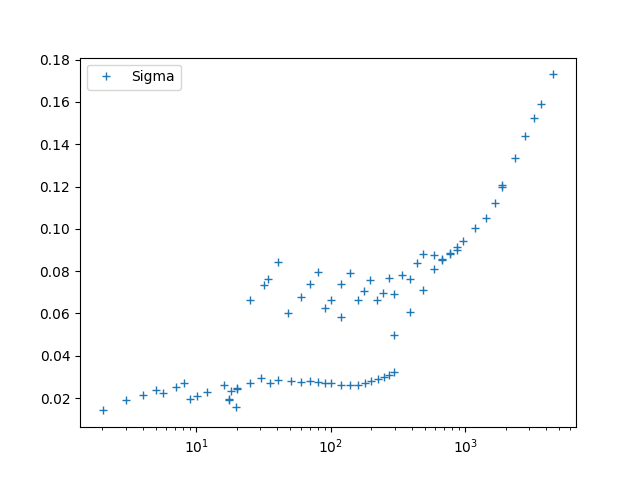

In [11]:
plt.figure()
plt.semilogx(expdata_all.vdata.Ei, expdata_all.FWHM/np.array(expdata_all.vdata.Ei),  "+")
plt.legend()

In [12]:
def sorted_xy_byx(x,y):
    s = np.argsort(x)
    return np.array(x)[s], np.array(y)[s]

In [13]:
ishighres = expdata_all.vdata.chopper_choice==0
highres_Ei = expdata_all.vdata.Ei[ishighres]
highres_FWHM = expdata_all.vdata.FWHM[ishighres]
highres_int = expdata_all.intensity[ishighres]

In [14]:
ishighflux = expdata_all.vdata.chopper_choice==1
highflux_Ei = expdata_all.vdata.Ei[ishighflux]
highflux_FWHM = expdata_all.vdata.FWHM[ishighflux]
highflux_int = expdata_all.intensity[ishighflux]

<IPython.core.display.Javascript object>


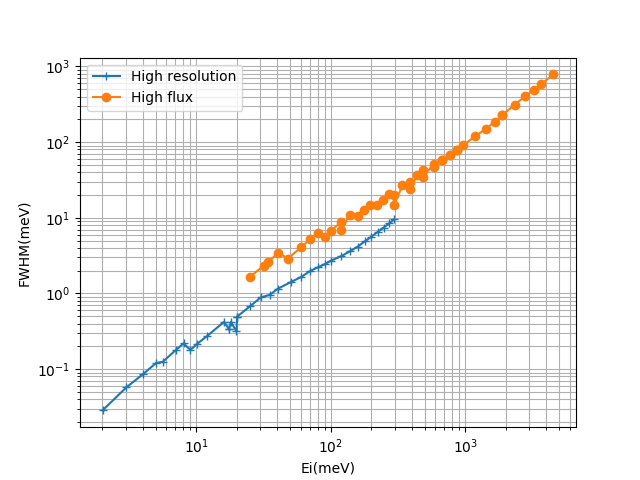

In [15]:
plt.figure()
x,y = sorted_xy_byx(highres_Ei, highres_FWHM)
plt.loglog(x,y, '+-', label='High resolution')
x,y = sorted_xy_byx(highflux_Ei, highflux_FWHM)
plt.loglog(x,y, 'o-', label='High flux')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.yticks
plt.xlabel('Ei(meV)')
plt.ylabel('FWHM(meV)')
plt.legend()

<IPython.core.display.Javascript object>


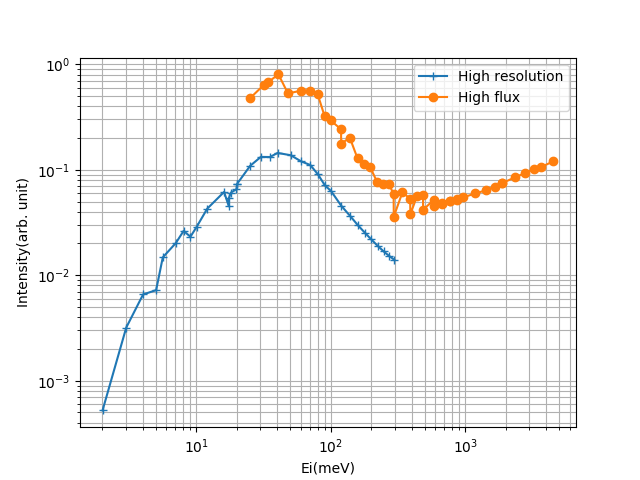

In [16]:
plt.figure()
x,y = sorted_xy_byx(highres_Ei, highres_int)
plt.loglog(x,y, '+-', label='High resolution')
x,y = sorted_xy_byx(highflux_Ei, highflux_int)
plt.loglog(x,y, 'o-', label='High flux')
plt.grid(True, which='minor')
plt.grid(True, which='major')
plt.yticks
plt.xlabel('Ei(meV)')
plt.ylabel('Intensity(arb. unit)')
plt.legend()

# PyChop

In [17]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [18]:
from PyChop import PyChop2

In [19]:
import PyChop

In [90]:
instrument = PyChop2('./sequoia.yaml')

In [91]:
# instrument.setChopper('High Resolution')
#instrument.getResFlux(Etrans=0, Ei_in=10)

<IPython.core.display.Javascript object>


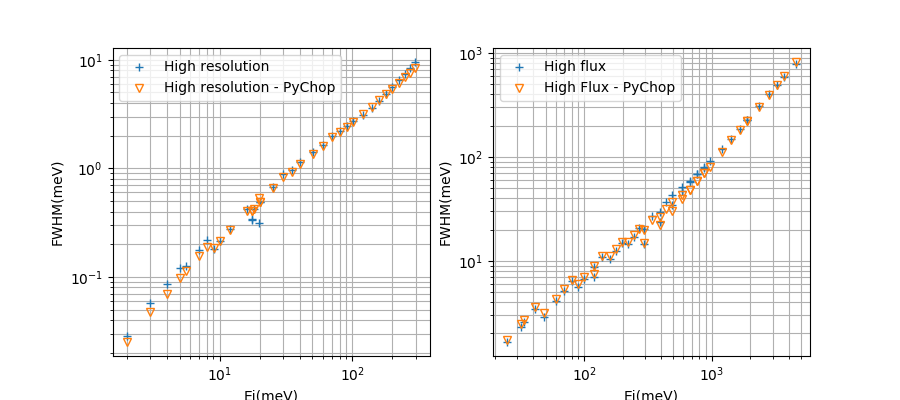

[0.02513716759713378, 0.047002251680033934, 0.06998749545337, 0.09678618918099334, 0.1144351934913914, 0.15737811546063238, 0.1881420583697369, 0.1834349630719286, 0.21196541778427924, 0.2731187022869693, 0.5293516415313386, 0.40467285464099434, 0.42157128440489217, 0.4852093875384833, 0.6533105849211056, 0.8252338191238509, 0.9306775053686486, 1.1034979035571675, 1.3683397815590437, 1.6230820581586989, 1.947803409936611, 2.175579898634603, 2.3978483337870165, 2.6893977023531175, 3.1686873809451757, 3.680281766927979, 4.263599699333785, 4.852770613256876, 5.433972044830818, 6.15761580537196, 6.880654364484524, 7.604762657731562, 8.329395307693582, 0.4017358563097045, 0.4017512922596562, 0.48531231700734845]


In [147]:
instrument = PyChop2('./sequoia.yaml')

def decorate(ax):
    ax.grid(True, which='minor')
    ax.grid(True, which='major')
    ax.set_xlabel('Ei(meV)')
    ax.set_ylabel('FWHM(meV)')
    ax.legend()
    return

fig, ax = plt.subplots(1, 2, figsize=(9,4))

x,y = expdata_all.vdata.Ei[ishighres], expdata_all.FWHM[ishighres]
freqs = expdata_all.chopper_freqs[ishighres]
ax[0].loglog(x,y, '+', label='High resolution')
# instrument.setChopper('Fine')
instrument.setChopper('SEQ-100-2.0-AST')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=__)[0][0] for _,__ in zip(x, freqs)]
print y_pychop
ax[0].loglog(x,y_pychop, 'v', mfc='none', label='High resolution - PyChop')
decorate(ax[0])

x,y = expdata_all.vdata.Ei[ishighflux], expdata_all.FWHM[ishighflux]
freqs = expdata_all.chopper_freqs[ishighflux]
ax[1].loglog(x,y, '+', label='High flux')
# instrument.setChopper('Sloppy')
instrument.setChopper('SEQ-700-3.5-AST')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=__)[0][0] for _,__ in zip(x, freqs)]
ax[1].loglog(x,y_pychop, 'v', mfc='none', label='High Flux - PyChop')
decorate(ax[1])


<IPython.core.display.Javascript object>


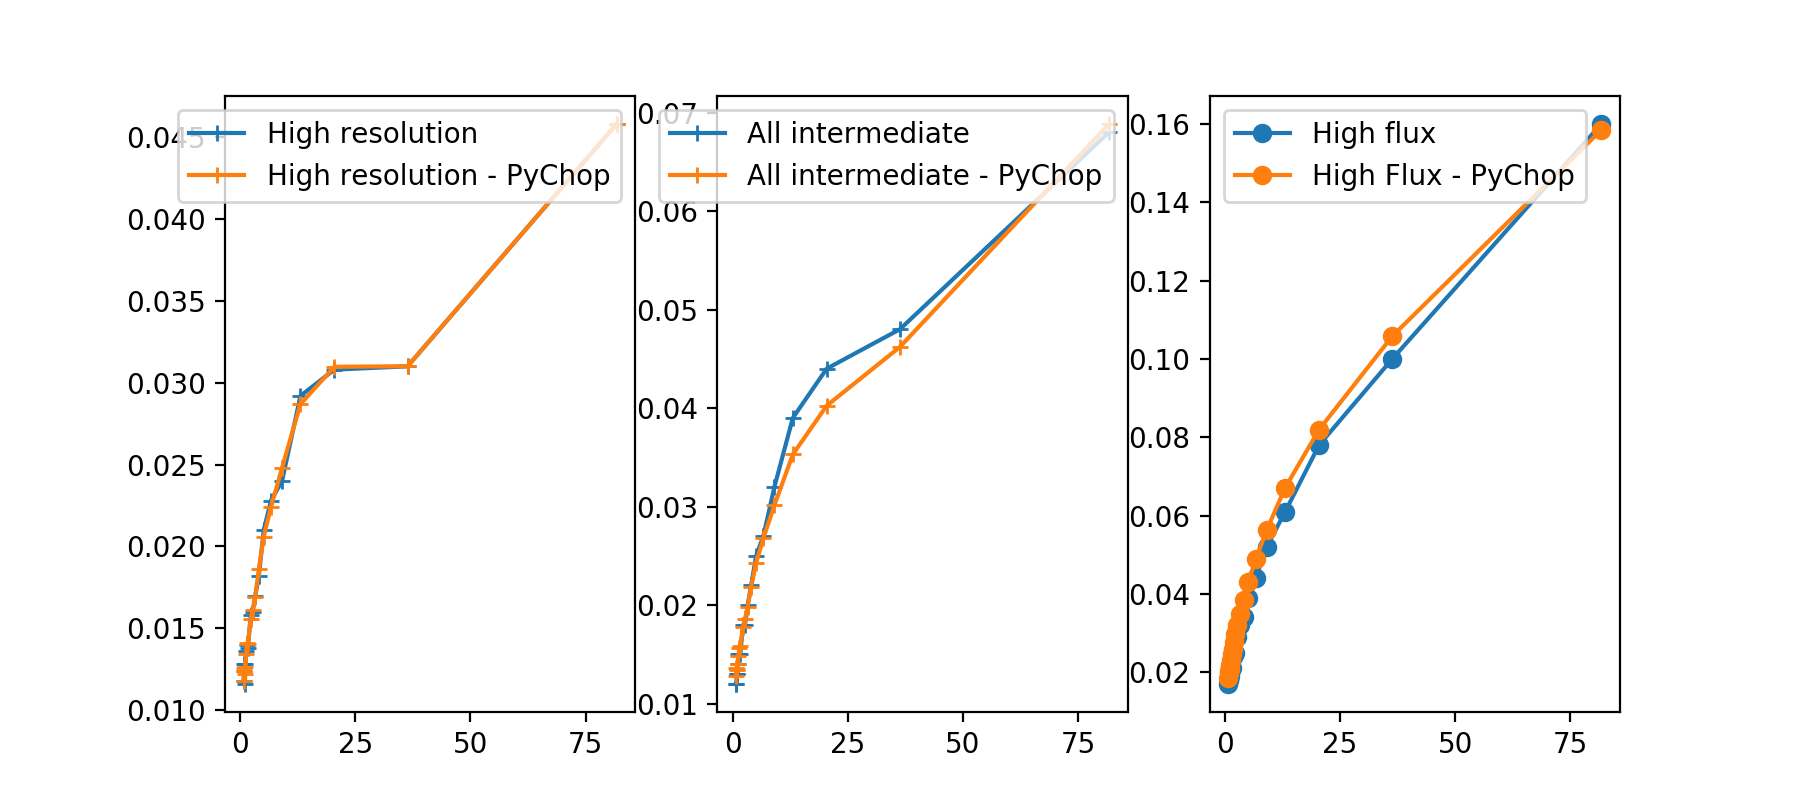

In [302]:
instrument = PyChop2('cncs.yaml')

fig, axes = plt.subplots(1, 3, figsize=(9,4))

ax = axes[0]
x,y = sorted_xy_byx(expdata_highres.Ei_list, expdata_highres.FWHM)
# ax.loglog(x,y, '+-', label='High resolution')
ax.plot(x, y/x, '+-', label='High resolution')
instrument.setChopper('High Resolution')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=180.)[0][0] for _ in x]
# ax.loglog(x,y_pychop, '+-', label='High resolution - PyChop')
ax.plot(x, y_pychop/x, '+-', label='High resolution - PyChop')
ax.legend()


ax = axes[1]
x,y = sorted_xy_byx(expdata_interm.Ei_list, expdata_interm.FWHM)
ax.plot(x, y/x, '+-', label='All intermediate')
instrument.setChopper('Intermediate')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_, frequency=240.)[0][0] for _ in x]
ax.plot(x, y_pychop/x, '+-', label='All intermediate - PyChop')
ax.legend()

ax = axes[2]
x,y = sorted_xy_byx(expdata_highflux.Ei_list, expdata_highflux.FWHM)
ax.plot(x,y/x, 'o-', label='High flux')
instrument.setChopper('High Flux')
y_pychop = [instrument.getResFlux(Etrans=0, Ei_in=_,  frequency=300.)[0][0] for _ in x]
ax.plot(x,y_pychop/x, 'o-', label='High Flux - PyChop')
ax.legend()